In [ ]:
from cgi import test
import os
import glob
import numpy as np

base_dir = 'chest_xray/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)

validation_NORMAL_fnames = os.listdir(validation_NORMAL_dir)
validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir)

test_NORMAL_fnames = os.listdir(test_NORMAL_dir)
test_PNEUMONIA_fnames = os.listdir(test_PNEUMONIA_dir)

n_train = len(train_NORMAL_fnames) + len(train_PNEUMONIA_fnames)
n_validation = len(validation_NORMAL_fnames) + len(validation_PNEUMONIA_fnames)
n_test = len(test_NORMAL_fnames) + len(test_PNEUMONIA_fnames)

print(n_train, n_validation, n_test)
print(len(train_NORMAL_fnames),len(train_PNEUMONIA_fnames))
print(len(test_NORMAL_fnames),len(test_PNEUMONIA_fnames))
print(len(validation_NORMAL_fnames),len(validation_PNEUMONIA_fnames))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   zoom_range = 0.2, 
                                   width_shift_range=0.1,  
                                   height_shift_range=0.1)

validation_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                         samplewise_center=True,
                                         samplewise_std_normalization=True,
                                         zoom_range = 0.2, 
                                         width_shift_range=0.1,  
                                         height_shift_range=0.1)

test_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(160, 160))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(160, 160))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  class_mode='binary',
                                                  target_size=(160, 160))

Found 4696 images belonging to 2 classes.
Found 578 images belonging to 2 classes.
Found 582 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential(name='X-ray_CNN')

model.add(tf.keras.layers.InputLayer(input_shape=(160,160,3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu')) # relu activation makes each value 0 if it is negative
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

METRICS = ['accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)
history = model.fit(train_generator, 
          steps_per_epoch= n_train//16,
          validation_data=validation_generator,
          epochs=20,
          verbose=1)
model.summary()

Epoch 1/20
293/293 [==============================] - 370s 1s/step - loss: 0.3362 - accuracy: 0.8628 - precision: 0.8947 - recall: 0.9195 - val_loss: 0.4897 - val_accuracy: 0.7803 - val_precision: 0.7738 - val_recall: 0.9977
Epoch 2/20
293/293 [==============================] - 330s 1s/step - loss: 0.2204 - accuracy: 0.9113 - precision: 0.9325 - recall: 0.9465 - val_loss: 0.1623 - val_accuracy: 0.9377 - val_precision: 0.9381 - val_recall: 0.9815
Epoch 3/20
293/293 [==============================] - 328s 1s/step - loss: 0.1886 - accuracy: 0.9265 - precision: 0.9455 - recall: 0.9538 - val_loss: 0.1729 - val_accuracy: 0.9273 - val_precision: 0.9333 - val_recall: 0.9722
Epoch 4/20
293/293 [==============================] - 328s 1s/step - loss: 0.1868 - accuracy: 0.9274 - precision: 0.9469 - recall: 0.9536 - val_loss: 0.3389 - val_accuracy: 0.8287 - val_precision: 0.9826 - val_recall: 0.7847
Epoch 5/20
293/293 [==============================] - 323s 1s/step - loss: 0.1762 - accuracy: 0.9346

In [8]:
import datetime
model.save('xraymodel_binary_'+str(datetime.datetime.now().strftime("%Y%m%d_%H%M%S")))

INFO:tensorflow:Assets written to: xraymodel_binary_20221130_131741\assets


INFO:tensorflow:Assets written to: xraymodel_binary_20221130_131741\assets


576
19/19 [==============================] - 7s 364ms/step


<Figure size 640x480 with 0 Axes>

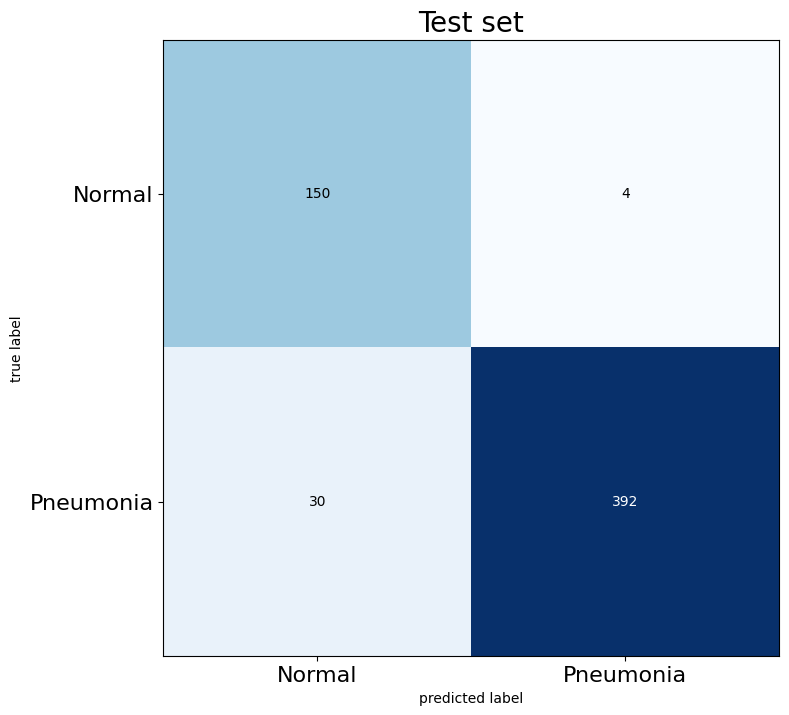

4688
294/294 [==============================] - 59s 202ms/step


<Figure size 640x480 with 0 Axes>

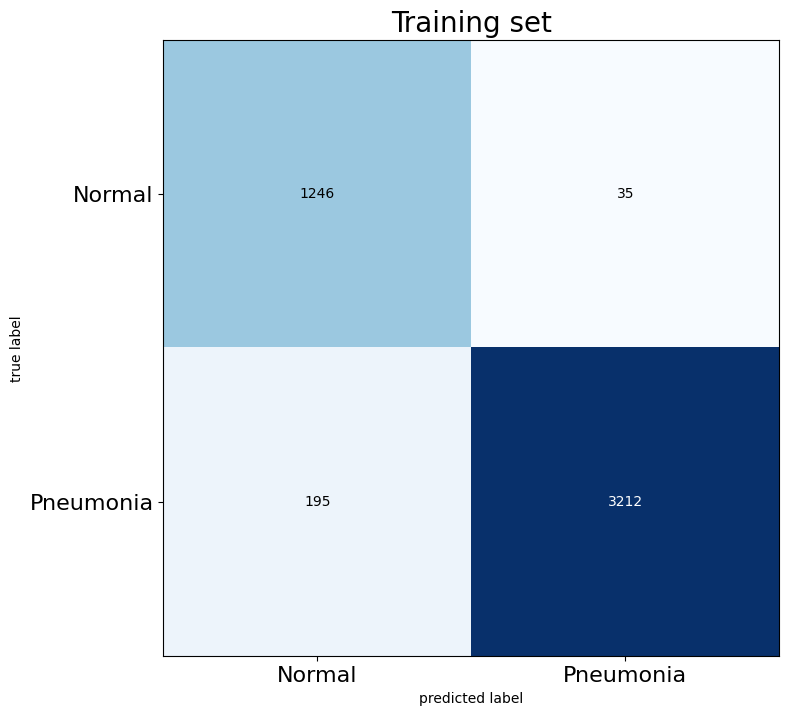

576
37/37 [==============================] - 8s 207ms/step


<Figure size 640x480 with 0 Axes>

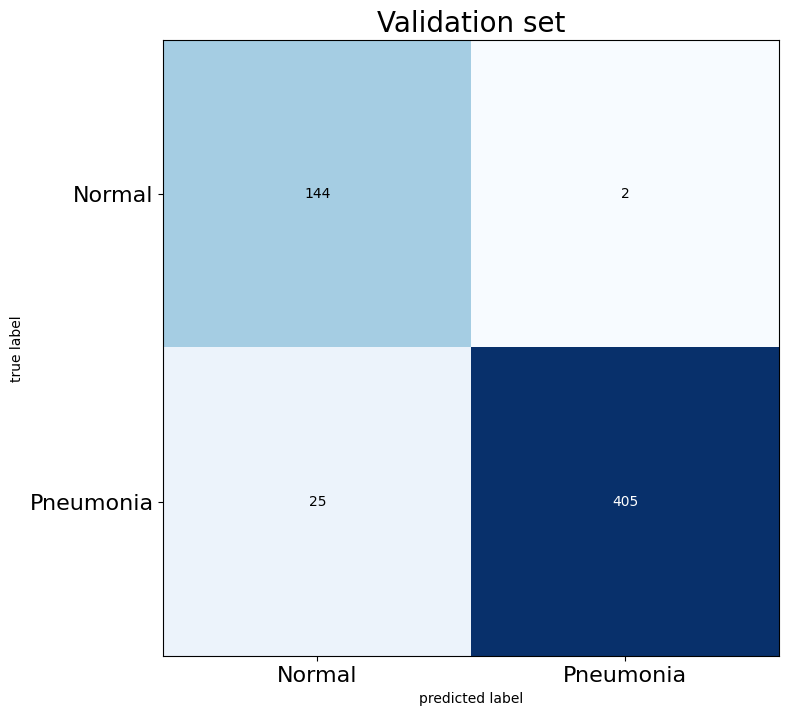

: 

In [9]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion(n, generator, title, batch_size):
    labels = []
    for i in range(0, n//batch_size):
        # print(i)
        labels.extend(generator[i][1])
    labels = np.array(labels)
    print(len(labels))
    # preds = model.predict_classes(generator)
    preds = (model.predict(generator) > 0.5).astype("int32")
    preds = np.reshape(preds, n)

    cm  = confusion_matrix(labels, preds[:len(labels)])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=False,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
    plt.title(title, fontsize=20)
    return plt.show()

plot_confusion(n_test, test_generator, 'Test set', 32)
plot_confusion(n_train, train_generator, 'Training set', 16)
plot_confusion(n_validation, validation_generator, 'Validation set', 16)

# 0.973958 accuracy for test